<a href="https://colab.research.google.com/github/hbeck118/GIS/blob/main/origin_countires_remittances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas==1.0.1

In [ ]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [ ]:
#!python --version
gpd.__version__

'1.0.1'

In [ ]:
!pip install mapclassify
import mapclassify #need for thematic map classification

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.3 MB/s eta 0:00:00


In [ ]:
#shapefile from https://datacatalog.worldbank.org/search/dataset/0038272/World-Bank-Official-Boundaries
! wget -q -O worldmap.zip https://raw.githubusercontent.com/hbeck118/GIS/main/wb_countries_admin0_10m.zip
zip_ref = zipfile.ZipFile('worldmap.zip', 'r'); zip_ref.extractall(); zip_ref.close()
world=gpd.read_file('WB_countries_Admin0_10m/WB_countries_Admin0_10m.shp')


<Axes: >

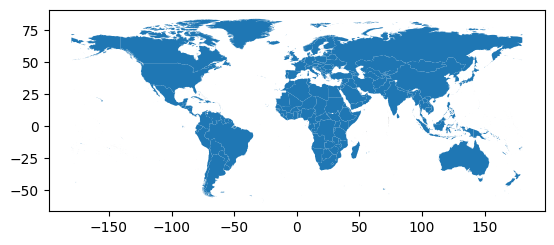

In [ ]:
world.plot()

In [ ]:
world.columns

Index(['OBJECTID', 'featurecla', 'LEVEL', 'TYPE', 'FORMAL_EN', 'FORMAL_FR',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10_', 'ISO_A2', 'ISO_A3',
       'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'CONTINENT',
       'REGION_UN', 'SUBREGION', 'REGION_WB', 'NAME_AR', 'NAME_BN', 'NAME_DE',
       'NAME_EN', 'NAME_ES', 'NAME_FR', 'NAME_EL', 'NAME_HI', 'NAME_HU',
       'NAME_ID', 'NAME_IT', 'NAME_JA', 'NAME_KO', 'NAME_NL', 'NAME_PL',
       'NAME_PT', 'NAME_RU', 'NAME_SV', 'NAME_TR', 'NAME_VI', 'NAME_ZH',
       'WB_NAME', 'WB_RULES', 'WB_REGION', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')

In [ ]:
world['NAME_EN']

,NAME_EN
0,Indonesia
1,Malaysia
2,Chile
3,Bolivia
4,Peru
...,...
246,United States Minor Outlying Islands
247,United States Minor Outlying Islands
248,United States Minor Outlying Islands
249,New Zealand


In [ ]:
#import data about countries of origin of forgeign born population in Germany from https://www.statista.com/statistics/890277/foreigner-numbers-by-country-of-origin-germany/
oc=pd.read_excel('https://raw.githubusercontent.com/hbeck118/GIS/main/countries_of_origin_germany.xlsx')

In [ ]:
oc.head(5)

,"Number of foreigners in Germany 2023, by country of origin",total number
0,Turkey,1548095
1,Ukraine,1239705
2,Syria,972460
3,Romania,909795
4,Poland,887715


In [ ]:
oc1 = oc.rename(columns={'Number of foreigners in Germany 2023, by country of origin': 'NAME_EN'})

In [ ]:
merged_oc = pd.merge(world, oc1, on='NAME_EN', how='outer', indicator=True)
merged_oc[['NAME_EN' ,'total number','_merge']]

,NAME_EN,total number,_merge
0,Afghanistan,419410.0,both
1,Albania,119795.0,both
2,Algeria,25045.0,both
3,American Samoa,NaN,left_only
4,Andorra,35.0,both
...,...,...,...
270,Yemen,12320.0,both
271,Yugoslavia (04/27/1992-02/04/2003),23035.0,right_only
272,Zambia,810.0,both
273,Zimbabwe,4180.0,both


In [ ]:
merged_oc_dif = merged_oc[merged_oc['_merge'] == 'right_only']
#merged_oc_dif['oc_1'] = merged_oc[merged_oc['_merge'] == 'left_only']['NAME_EN']
#merged_oc_dif[['NAME_EN', 'total number', 'oc_1']]
merged_oc[merged_oc['_merge'] == 'left_only']

,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,...,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry,total number,_merge
3,228.0,Admin-0 country,2.0,Dependency,American Samoa,None,51504.0,8.0,711.00,2017.0,...,Samoa thuộc Mỹ,美屬薩摩亞,American Samoa (US),Name in italic,Other,1.073705,0.015101,"MULTIPOLYGON (((-170.59101 -14.26483, -170.576...",NaN,left_only
6,196.0,Admin-0 country,2.0,Dependency,None,None,17087.0,6.0,175.40,2017.0,...,Anguilla,安圭拉,Anguilla (UK),Name in italic,Other,0.506124,0.006891,"MULTIPOLYGON (((-63.00739 18.27302, -62.984 18...",NaN,left_only
10,172.0,Admin-0 country,2.0,Country,Aruba,None,115120.0,9.0,2516.00,2017.0,...,Aruba,阿魯巴,Aruba (Neth.),Name in italic,Other,0.652367,0.014119,"POLYGON ((-69.99694 12.57758, -69.93639 12.531...",NaN,left_only
12,239.0,Admin-0 country,2.0,Dependency,None,None,2801.0,4.0,42.02,2017.0,...,Vùng lãnh thổ Ấn Độ Dương thuộc Úc,澳屬印度洋領地,Cocos (Keeling) Islands (Aus.),Name in italic,Other,0.318738,0.001097,"MULTIPOLYGON (((96.91391 -12.19451, 96.90219 -...",NaN,left_only
13,240.0,Admin-0 country,2.0,Dependency,None,None,2801.0,4.0,42.02,2017.0,...,Vùng lãnh thổ Ấn Độ Dương thuộc Úc,澳屬印度洋領地,Christmas Island (Aus.),Name in italic,Other,0.489928,0.008153,"POLYGON ((105.70411 -10.43084, 105.71469 -10.4...",NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,249.0,Admin-0 country,2.0,Dependency,None,None,300.0,2.0,0.00,0.0,...,Các tiểu đảo xa của Hoa Kỳ,美国本土外小岛屿,Kingman Reef (US),Name in italic,Other,0.059570,0.000222,"POLYGON ((-162.40018 6.44514, -162.38528 6.445...",NaN,left_only
261,193.0,Admin-0 country,2.0,Dependency,Virgin Islands of the United States,None,107268.0,9.0,3792.00,2017.0,...,Quần đảo Virgin thuộc Mỹ,美屬維爾京群島,U.S. Virgin Islands (US),Name in italic,Other,1.705456,0.030265,"MULTIPOLYGON (((-64.5594 17.75161, -64.58519 1...",NaN,left_only
262,150.0,Admin-0 country,2.0,Country,United States of America,None,326625791.0,17.0,18560000.00,2017.0,...,Hoa Kỳ,美国,United States of America,None,Other,948.724319,1116.361761,"MULTIPOLYGON (((-95.16057 49.36949, -95.10282 ...",NaN,left_only
269,217.0,Admin-0 country,2.0,Dependency,Wallis and Futuna Islands,None,15714.0,6.0,60.00,2017.0,...,Wallis và Futuna,瓦利斯和富圖納,Wallis-et-Futuna (Fr.),Name in italic,Other,0.723244,0.011644,"MULTIPOLYGON (((-178.14232 -14.24358, -178.108...",NaN,left_only


In [ ]:
list(filter(lambda x: 'Syria' in x,world['name'].to_list()))

['Syrian Arab Republic']

In [ ]:
merged_oc.query('_merge != "both"')['NAME_EN'].to_list()

['American Samoa',
 'Anguilla',
 'Aruba',
 'Australian Indian Ocean Territories',
 'Australian Indian Ocean Territories',
 'Bahamas',
 'Bermuda',
 'British Indian Ocean Territory',
 'British Overseas Territories',
 'British Virgin Islands',
 'Cabo Verde',
 'Cape Verde',
 'Cayman Islands',
 'China',
 'Clipperton Island',
 'Cook Islands',
 'Curaçao',
 'Czech Republic',
 'Czechia',
 'Czechoslovakia (until December 31, 1992)',
 'Democratic Republic of Congo',
 'Democratic Republic of the Congo',
 'East Timor',
 'Eswatini',
 'Falkland Islands',
 'Faroe Islands',
 'Federated States of Micronesia',
 'French Polynesia',
 'French Southern and Antarctic Lands',
 'Gambia',
 'Germany',
 'Gibraltar',
 'Greenland',
 'Guam',
 'Guantanamo Bay Naval Base',
 'Guernsey',
 'Guinea Bissau',
 'Guinea-Bissau',
 'Heard Island and McDonald Islands',
 'Isle of Man',
 'Jersey',
 'Marshall Islands',
 'Montserrat',
 'Nauru',
 'New Caledonia',
 'Niue',
 'Norfolk Island',
 'North Macedonia',
 'Northern Mariana Islan